# Histograms and Box Plots

Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. 

Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
num_cols = cols[1:]
norm_reviews = reviews[cols]

Let's first compare the **frequency distributions** of user ratings from Fandango with those from IMDB using tables. A column's <a href="https://en.wikipedia.org/wiki/Frequency_distribution">frequency distribution</a> consists of the unique values in that column along with the count for each of those values (or their frequency). 

We can use <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html">Series.value_counts()</a> to return the frequency distribution as Series object:
> `freq_counts = df['Fandango_Ratingvalue'].value_counts()`

The resulting Series object will be sorted by frequency in descending order:
![](https://s3.amazonaws.com/dq-content/fandango_frequency_distribution.png)

We can use <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_index.html">Series.sort_index()</a> to sort the frequency distribution in ascending order by the values in the column (which make up the index for the Series object):
> `freq_counts = df['Fandango_Ratingvalue'].value_counts()` <br/>
> `sorted_freq_counts = freq_counts.sort_index()`

![](https://s3.amazonaws.com/dq-content/both_fandango_distributions.png)

In [6]:
# return the frequency counts for the Fandango_Ratingvalue column
freq_counts = norm_reviews.Fandango_Ratingvalue.value_counts()

# Sort the resulting Series object by the index
fandango_distribution = freq_counts.sort_index()

# return frequency counts the IMDB_norm column and sort object by index
imdb_distribution = norm_reviews.IMDB_norm.value_counts().sort_index()

While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:

- What percent of the ratings are contained in the 2.0 to 4.0 range?
    - How does this compare with other sites?
- Which values represent the top 25% of the ratings? The bottom 25%?
    - How does this compare with other sites?
    
Comparing frequency distributions is also challenging because the `Fandango_Ratingvalue` column contains 21 unique values while `IMDB_norm` contains 41 unique values. 

Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called **bins**. We can then sum the frequencies for the values that fall into each bin.

![](https://s3.amazonaws.com/dq-content/histogram_binning.png)

**Generate a histogram**
> `ax.hist()`

The `Axes.hist()` method has 1 required parameters, an iterable object containing the values we want a histogram for. By default, matplotlib will:

- calculate the minimum and maximum value from the sequence of values we passed in
- create 10 bins of equal length that span the range from the minimum to the maximum value
- group unique values into the bins
- sum up the associated unique values
- generate a bar for the frequency sum for each bin

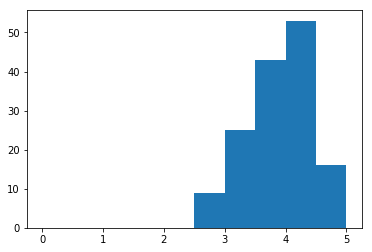

In [7]:
# create a figure and axes
fig, ax = plt.subplots()

# generate histogram using a range of 0 to 5
ax.hist(norm_reviews.Fandango_Ratingvalue, range=(0,5))

# display the plot
plt.show()

> *What percent of the ratings are contained in the 2.0 to 4.0 range?*

We can visually examine the proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on Fandango fall in this range. We can increase the number of bins from 10 to 20 for improved resolution of the distribution. 

The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). The bins parameter for `Axes.hist()` is the 2nd positional parameter, but can also be specified as a named parameter:
> `ax.hist(norm_reviews['Fandango_Ratingvalue'], 20, range=(0, 5))` <br />
> `ax.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))`

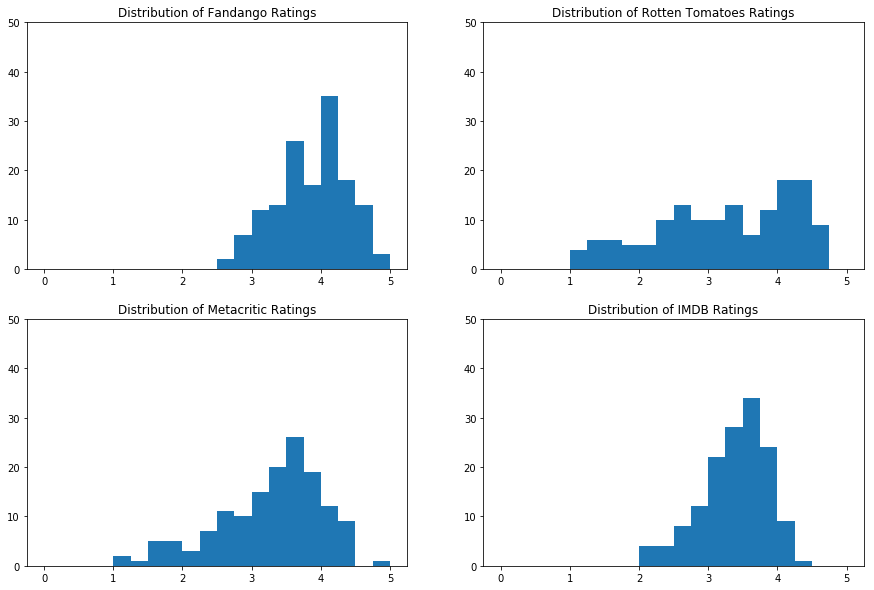

In [35]:
# instantiate figure
fig = plt.figure(figsize=(15,10))

# ax1 subplot, Fandango
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(norm_reviews.Fandango_Ratingvalue, bins=20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

# ax2 subplot, Rotten Tomatoes
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(norm_reviews.RT_user_norm, bins=20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

# ax3 subplot, Metacritic
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(norm_reviews.Metacritic_user_nom, bins=20, range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

# ax4 subplot, IMDB
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(norm_reviews.IMDB_norm, bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

# display plot
plt.show()

From the histograms, we can make the following observations:

- Around 50% of user ratings from Fandango fall in the 2 to 4 score range
- Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
- Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
- Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent <a href="https://en.wikipedia.org/wiki/Quartile">quartiles</a>. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

---
## Box Plots

A box plot consists of box-and-whisker diagrams, which represents the different quartiles in a visual way.

Here's a box plot of the values in the `RT_user_norm` column:
![](https://s3.amazonaws.com/dq-content/boxplot_intro.png)

The two regions contained within the box in the middle make up the **interquartile range**, or IQR. The IQR is used to *measure dispersion of the values*. The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.

**Generate a boxplot using `Axes.boxplot()`:**
> `ax.boxplot(norm_reviews['RT_user_norm'])`

Matplotlib will sort the values, calculate the quartiles that divide the values into four equal regions, and generate the box and whisker diagram.

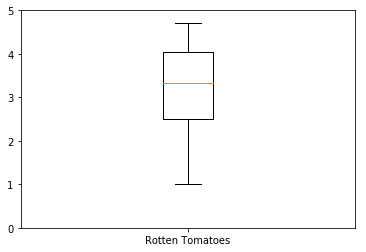

In [42]:
# generate a single subplot
fig, ax = plt.subplots()

# generate a box plot, Rotten Tomatoes
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0,5)

# display plot
plt.show()

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

- the **bottom 25%** of user ratings range from around 1 to 2.5
- the **top 25%** of of user ratings range from around 4 to 4.6

To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot. 

When selecting multiple columns to pass in to `Axes.boxplot()`, we need to use the values accessor to return a multi-dimensional numpy array:

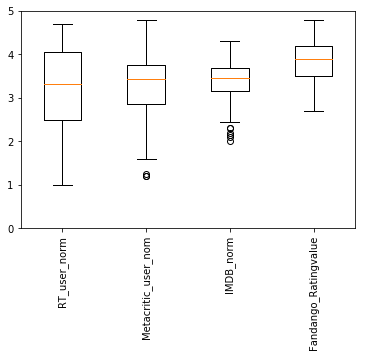

In [51]:
# create figure and axes instance
fig, ax = plt.subplots()

# generate boxplot for each column
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)

# display plot
plt.show()

From the boxplot, we can reach the following conclusions:

- user ratings from Rotten Tomatoes and Metacritic span a larger range of values
- user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values

In addition, you may have noticed there are a couple user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called **outliers** or extreme values. 

Outliers are usually treated as abnormal values and affect the overall observation of the data set due to their very high or low values.